<a href="https://colab.research.google.com/github/TheHouseOfVermeulens/Financial-Engineering/blob/master/Introduction_to_Futures_Contracts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Futures Contract vs. Spot Markets

In 2016, a corn farmer decided to sell his corn at the spot price to a distributor.

Decide whether his decision to sell corn at the spot price was a wise one by comparing his profits from the market contract with his potential profits from the futures contract.

Use the price of CORN, an ETF, as the spot price for 6 bushels of corn when he goes to market.

You may also assume the following:

    The producer plans on selling 15,000 bushels of corn in September 2016
    The farmer would enter into a futures position on June 1st
    The spot price sale would take place on the same date that the futures contract expires
    No fees or payments are included in the futures sale or the market sale

(Note that the listed futures price of corn is for one bushel.)

In [0]:
bushels = 15000
spot_symbol = 'CORN'
futures_contract = symbols('CNU16')
spot_prices = get_pricing(spot_symbol, start_date = '2016-06-01', end_date = '2016-09-15', fields = 'price')
futures_prices = get_pricing(futures_contract, start_date = '2016-06-01',end_date='2016-09-15', fields='price')

# Sale date of corn
sale_date = '2016-09-14'

# Plotting
plt.plot(spot_prices);
plt.axvline(sale_date, linestyle='dashed', color='r', label='Sale Date')
plt.legend();

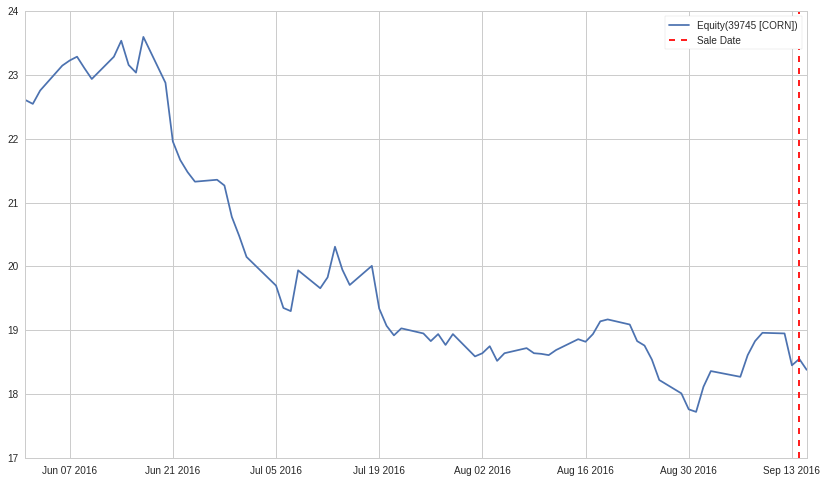

In [4]:
p = spot_prices.loc[sale_date]

market_profits = p * (bushels//6)

print 'profits from market price: $', market_profits


SyntaxError: ignored



```
profits from market price: $ 46375.0
```



In [0]:
futures_entry_date = '2016-06-01'

futures_profits = futures_prices.loc[futures_entry_date] * bushels
print 'profits from future contract: $', futures_profits




```
profits from future contract: $ 62287.5
```



We can clearly see that it would have been wiser for the farmer to sell his corn using a futures contract to lock in the price in June. Let's calculate the lost profit:

In [0]:
lost_profits = futures_profits - market_profits
print 'Profits the producer lost in a year: $', int(lost_profits)




```
Profits the producer lost in a year: $ 15912
```



#Carrying Costs
##a. Contango

Consider the same corn farmer from Exercise 1.

Calculate the theoretical futures price series as a function of time, given the following:

    The cost of carry is 0.01

The spot price of corn was originally 1000 dollars, and that the price is driven by a normal distribution
Maturity is achieved after 100 days

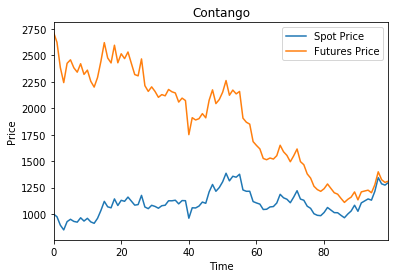

In [7]:
# A toy example to show Contango
N = 100 # Days to expiry of futures contract
cost_of_carry = 0.01

spot_price = pd.Series(np.ones(N), name = "Spot Price")
futures_price = pd.Series(np.ones(N), name = "Futures Price")

spot_price[0] = 1000
futures_price[0] = spot_price[0]*np.exp(cost_of_carry*N)

for n in range(1, N): 
    spot_price[n] = spot_price[n-1]*(1 + np.random.normal(0, 0.05))
    futures_price[n] = spot_price[n]*np.exp(cost_of_carry*(N - n))

spot_price.plot()
futures_price.plot()
plt.legend()

plt.title('Contango')
plt.xlabel('Time')
plt.ylabel('Price');


##b. Backwardation

Consider the corn farmer again.

Calculate the futures price as a function of time, given the following:

The cost of carry is -0.01
The spot price of corn was originally $1000, and that the price is driven by a normal distribution
Maturity is achieved after 100 days



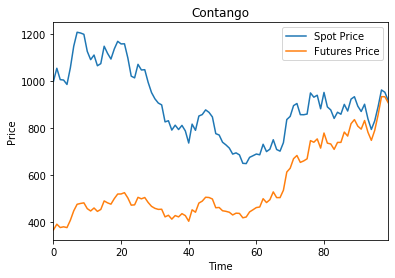

In [8]:
# A toy example to show Contango
N = 100 # Days to expiry of futures contract
cost_of_carry = -0.01

spot_price = pd.Series(np.ones(N), name = "Spot Price")
futures_price = pd.Series(np.ones(N), name = "Futures Price")

spot_price[0] = 1000
futures_price[0] = spot_price[0]*np.exp(cost_of_carry*N)

for n in range(1, N): 
    spot_price[n] = spot_price[n-1]*(1 + np.random.normal(0, 0.05))
    futures_price[n] = spot_price[n]*np.exp(cost_of_carry*(N - n))

spot_price.plot()
futures_price.plot()
plt.legend()

plt.title('Contango')
plt.xlabel('Time')
plt.ylabel('Price');
